In [1]:
import pandas as pd
import numpy as np
#import seaborn
from matplotlib import pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tq

In [2]:
df = pd.read_table('/Users/jaredlorince/Desktop/temp_data/5759068.txt',header=None,nrows=None,names=['song_id','artist_id','ts'],parse_dates=['ts'])

In [3]:
encountered = set()
new = []
blocks = []
last = None
block_idx = -1
for a in df.artist_id:
    if a not in encountered:
        new.append(1)
        encountered.add(a)
    else:
        new.append(0)
    if a != last:
        block_idx += 1
    blocks.append(block_idx)
    last = a
df['new'] = new
df['block'] = blocks
df['new_block'] = df['new'].cumsum()

In [99]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.831061
2.0,0.740909
3.0,0.679545
4.0,0.636364
5.0,0.597727
6.0,0.568939
7.0,0.543939
8.0,0.517424


(0, 100)

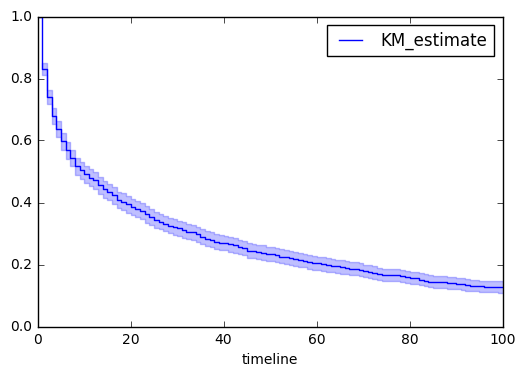

In [49]:
durations = df[df.new==0].groupby('new_block').song_id.count()
if df.new.iloc[-1]==0:
    observed = [1]*(len(durations)-1)+[0]
else:
    observed = [1]*len(durations)
#survival_data = pd.DataFrame({'duration':durations.values,'observed':observed})
kmf.fit(durations, event_observed=observed)
fig,ax = plt.subplots()
kmf.plot(ax=ax)
ax.set_xlim(0,100)

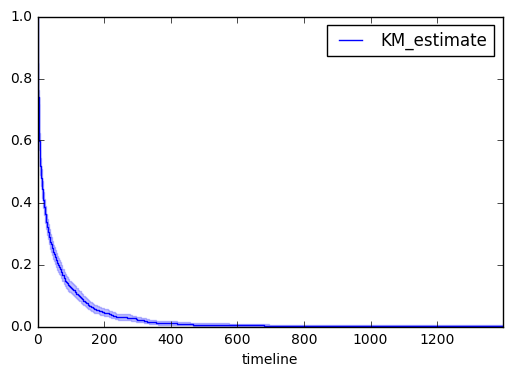

In [89]:
kmf.fit(durations,event_observed=observed).plot()

In [117]:
kmf.survival_function_.reindex(range(1,1001))['KM_estimate'].values

array([  8.31060606e-01,   7.40909091e-01,   6.79545455e-01,
         6.36363636e-01,   5.97727273e-01,   5.68939394e-01,
         5.43939394e-01,   5.17424242e-01,   5.04545455e-01,
         4.90909091e-01,   4.80303030e-01,   4.71969697e-01,
         4.56060606e-01,   4.42424242e-01,   4.34090909e-01,
         4.23484848e-01,   4.08333333e-01,   4.03030303e-01,
         3.93939394e-01,   3.84848485e-01,   3.79545455e-01,
         3.71969697e-01,   3.61363636e-01,   3.53787879e-01,
         3.43939394e-01,   3.38636364e-01,   3.31818182e-01,
         3.25757576e-01,   3.21212121e-01,   3.16666667e-01,
         3.11363636e-01,   3.06060606e-01,   3.03787879e-01,
         2.96969697e-01,   2.89393939e-01,   2.83333333e-01,
         2.79545455e-01,   2.72727273e-01,   2.70448215e-01,
         2.68928843e-01,   2.65130413e-01,   2.62091669e-01,
         2.56014181e-01,   2.52215751e-01,   2.44618891e-01,
         2.43099519e-01,   2.40820461e-01,   2.38541403e-01,
         2.33983287e-01,

          NA_estimate
timeline             
0.0          0.000000
1.0          0.184976
2.0          0.299745
3.0          0.386153
4.0          0.451769


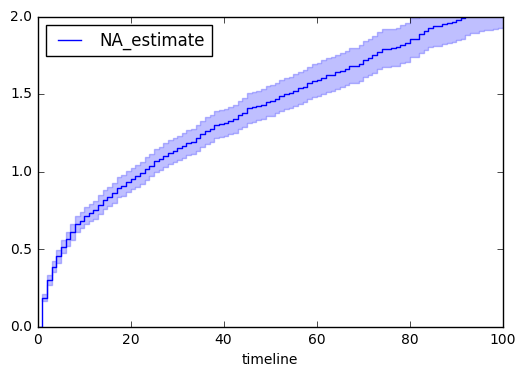

In [58]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

naf.fit(durations,event_observed=observed)
print(naf.cumulative_hazard_.head())
naf.plot(xlim=(0,100),ylim=(0,2))

In [111]:
naf.smoothed_hazard_(bandwidth=1).reindex(range(1,1001))['differenced-NA_estimate'].values

array([ 0.13873168,  0.08607701,  0.06480574,  0.04921212,  0.04694783,
        0.03699646,  0.03367912,  0.03745428,  0.01888988,  0.0205336 ,
        0.01636853,  0.01311639,  0.02569582,  0.02274816,  0.01424913,
        0.0185358 ,  0.02730055,  0.00979491,  0.01709475,  0.0174935 ,
        0.0103962 ,  0.01510625,  0.02167333,  0.0158736 ,  0.02115107,
        0.01164103,  0.01523754,  0.01380936,  0.01052648,  0.01067633,
        0.0126509 ,  0.01286796,  0.00558315,  0.01700324,  0.0193559 ,
        0.01585263,  0.01008079,  0.01849408,  0.00628495,  0.00421942,
        0.01065358,  0.00863318,  0.01757034,  0.01119423,  0.02290253,
        0.00466564,  0.00705334,  0.0071203 ,  0.01444666,  0.00243506,
        0.01229535,  0.01250028,  0.00760141,  0.00511075,  0.01293134,
        0.01050804,  0.00797879,  0.01621683,  0.01100936,  0.00556588,
        0.01125723,  0.01142878,  0.00288462,  0.01165071,  0.00885836,
        0.00896424,  0.01212146,         nan,  0.01232059,  0.01

In [105]:
np.full(1000,np.nan).shape

(1000,)

In [22]:
result = np.zeros((1000,100),dtype=float)
for rep in tq(range(1000)):
    df_shuffle = df.sample(frac=1).reset_index(drop=True)
    encountered = set()
    new = []
    for a in df_shuffle.artist_id:
        if a not in encountered:
            new.append(1)
            encountered.add(a)
        else:
            new.append(0)
    df_shuffle['new'] = new
    df_shuffle['new_block'] = df_shuffle['new'].cumsum()
    #result[rep] = df_shuffle.groupby(df_shuffle.index/1000).new.mean().values
    result[rep] = df_shuffle[df_shuffle.new==0].groupby('new_block').artist_id.count().value_counts().reindex(range(1,101),fill_value=0).values
    break

In [130]:
result = np.zeros((1000,100),dtype=float)
for rep in tq(xrange(1000)):
    df_shuffle = df_blocked.sample(frac=1).reset_index(drop=True)
    encountered = set()
    new = []
    for a in df_shuffle.artist_id:
        if a not in encountered:
            new.append(1)
            encountered.add(a)
        else:
            new.append(0)
    df_shuffle['new'] = new
    df_shuffle['new_block'] = df_shuffle['new'].cumsum()
    #result[rep] = df_shuffle.groupby(df_shuffle.index/1000).new.mean().values
    result[rep] = df_shuffle[df_shuffle.new==0].groupby('new_block').artist_id.count().value_counts().reindex(range(1,101),fill_value=0).values

In [5]:
exploit_streak = [np.nan]
streak = 0
for n in df.new:
    if n==0:
        streak +=1 
        exploit_streak.append(streak)
    else:
        exploit_streak.append(0)
        streak = 0
df['exploit_streak'] = exploit_streak[:-1]
    

In [23]:
exploit_streak = [np.nan]
streak = 0
for n in df_shuffle.new:
    if n==0:
        streak +=1 
        exploit_streak.append(streak)
    else:
        exploit_streak.append(0)
        streak = 0
df_shuffle['exploit_streak'] = exploit_streak[:-1]
    

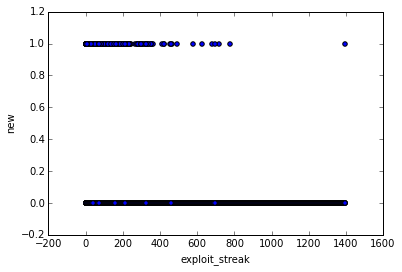

In [148]:
df.plot(kind='scatter',x='exploit_streak',y='new')

In [172]:
import statsmodels.api as sm
import statsmodels
test = statsmodels.tools.add_constant(df)
logit = sm.Logit(df['new'][1:], [testtest['const'][1:])
result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.138915
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    new   No. Observations:                58832
Model:                          Logit   Df Residuals:                    58831
Method:                           MLE   Df Model:                            0
Date:                Tue, 17 Jan 2017   Pseudo R-squ.:                   0.000
Time:                        12:30:30   Log-Likelihood:                -8172.6
converged:                       True   LL-Null:                       -8172.6
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -3.4354      0.024   -144.887      0.000        -3.482    -3.389


In [169]:
logit = sm.Logit(df_shuffle['new'][1:], df_shuffle['exploit_streak'][1:])
result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.264124
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    new   No. Observations:                58832
Model:                          Logit   Df Residuals:                    58831
Method:                           MLE   Df Model:                            0
Date:                Tue, 17 Jan 2017   Pseudo R-squ.:                 -0.9013
Time:                        12:29:39   Log-Likelihood:                -15539.
converged:                       True   LL-Null:                       -8172.6
                                        LLR p-value:                       nan
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
exploit_streak    -0.1099      0.001    -98.269      0.000        -0.112    -0.108


In [18]:
from statsmodels.formula.api import logit
l = logit(formula = 'new ~ 1', data = df).fit()
l.summary()

Optimization terminated successfully.
         Current function value: 0.138971
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    new   No. Observations:                58833
Model:                          Logit   Df Residuals:                    58832
Method:                           MLE   Df Model:                            0
Date:                Tue, 17 Jan 2017   Pseudo R-squ.:                   0.000
Time:                        13:06:34   Log-Likelihood:                -8176.1
converged:                       True   LL-Null:                       -8176.1
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.4348      0.024   -144.902      0.000        -3.481    -3.388
==============================================================================
"""

In [19]:
from statsmodels.formula.api import logit
l = logit(formula = 'new ~ exploit_streak', data = df).fit()
l.summary()

Optimization terminated successfully.
         Current function value: 0.128932
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    new   No. Observations:                58832
Model:                          Logit   Df Residuals:                    58830
Method:                           MLE   Df Model:                            1
Date:                Tue, 17 Jan 2017   Pseudo R-squ.:                 0.07186
Time:                        13:06:44   Log-Likelihood:                -7585.3
converged:                       True   LL-Null:                       -8172.6
                                        LLR p-value:                2.023e-257
==================================================================================
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -2.6427      0.031    -84.541      0.000        -2.704    -2.581
exploit_streak    -0.0150      0.001    -23.498      0.000        -0.016    -0.014
==================================================================================
"""

In [24]:
from statsmodels.formula.api import logit
l = logit(formula = 'new ~ exploit_streak', data = df_shuffle).fit()
l.summary()

Optimization terminated successfully.
         Current function value: 0.135871
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    new   No. Observations:                58832
Model:                          Logit   Df Residuals:                    58830
Method:                           MLE   Df Model:                            1
Date:                Tue, 17 Jan 2017   Pseudo R-squ.:                 0.02191
Time:                        13:08:38   Log-Likelihood:                -7993.5
converged:                       True   LL-Null:                       -8172.6
                                        LLR p-value:                 6.927e-80
==================================================================================
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -3.0160      0.031    -96.416      0.000        -3.077    -2.955
exploit_streak    -0.0103      0.001    -15.876      0.000        -0.012    -0.009
==================================================================================
"""

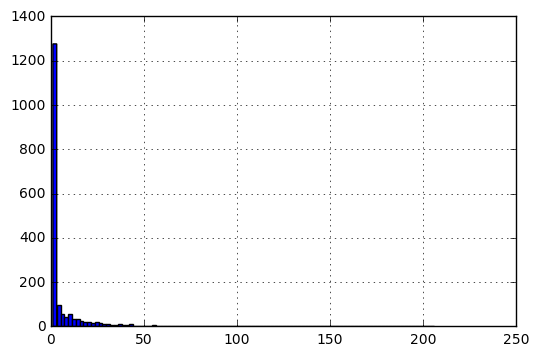

In [78]:
df.groupby('artist_id').apply(lambda x: len(x.song_id.unique())).hist(bins=100)

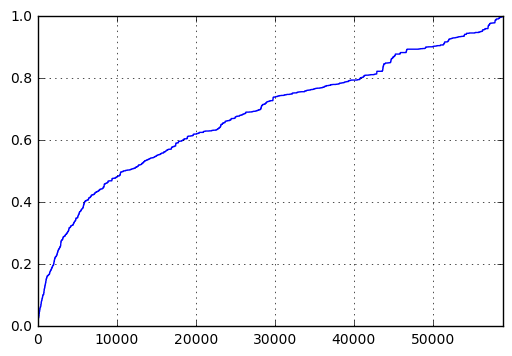

In [82]:
(df.new.cumsum() / float(len(df.artist_id.unique()))).plot(grid=True)

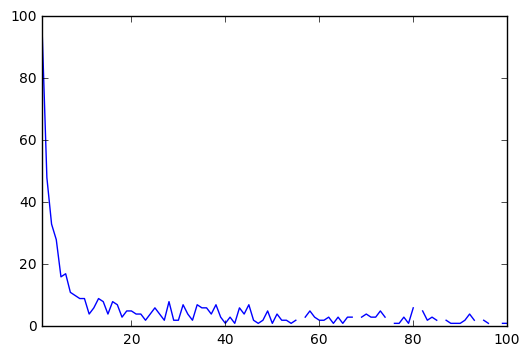

In [96]:
df[10788:][df[10788:].new==0].groupby('new_block').song_id.count().value_counts().sort_index().reindex(range(1,101)).plot()

In [95]:
((df.new.cumsum() / float(len(df.artist_id.unique())))<.5).sum()

10788

In [115]:
vcc = df[df.new==0].groupby('new_block').song_id.count().value_counts().sort_index().cumsum()

In [175]:
x = df[df.new==0].groupby('new_block').song_id.count().value_counts().sort_index()
x = x[::-1].cumsum()[::-1]

(0.8, 1)

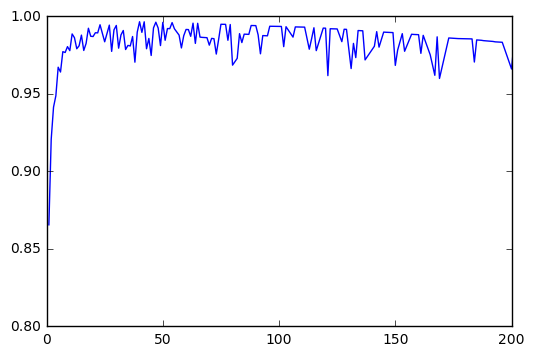

In [158]:
fig,ax = plt.subplots(1,1)
(x.shift(-1) / x).plot(ax=ax)
ax.set_xlim(0,200)
ax.set_ylim(.8,1)

In [187]:
result = (x.shift(-1) / x)

In [216]:
from statsmodels.formula.api import logit
l = logit(formula = 'new ~ exploit_streak_switch', data = df).fit()
l.summary()

Optimization terminated successfully.
         Current function value: 0.130991
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    new   No. Observations:                58832
Model:                          Logit   Df Residuals:                    58830
Method:                           MLE   Df Model:                            1
Date:                Thu, 19 Jan 2017   Pseudo R-squ.:                 0.05704
Time:                        17:54:24   Log-Likelihood:                -7706.5
converged:                       True   LL-Null:                       -8172.6
                                        LLR p-value:                9.220e-205
=========================================================================================
                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                -2.9315      0.027   -110.054      0.000        -2.984    -2.879
exploit_streak_switch    -0.1964      0.009    -21.086      0.000        -0.215    -0.178
=========================================================================================
"""

In [214]:
explore = []
last = None
for a in df.artist_id:
    if a == last:
        explore.append(0)
    else:
        explore.append(1)
    last = a
df['explore'] = explore
df['explore_block'] = df['explore'].cumsum()

exploit_streak = [np.nan]
streak = 0
for n in df.explore:
    if n==0:
        streak +=1 
        exploit_streak.append(streak)
    else:
        exploit_streak.append(0)
        streak = 0
df['exploit_streak_switch'] = exploit_streak[:-1]
    

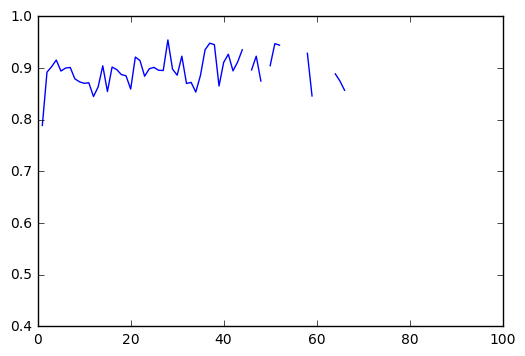

In [212]:
exploit_streaks = df[df.explore==0].groupby('explore_block').song_id.count().value_counts().sort_index()
cumulative = exploit_streaks[::-1].cumsum()[::-1]
max_idx = 1000
(cumulative.shift(-1)/cumulative.astype(float)).reindex(range(1,max_idx+1),fill_value=np.nan).plot(xlim=(0,100))

In [215]:
df

,song_id,artist_id,ts,new,block,new_block,exploit_streak,explore,explore_block,exploit_streak_switch
0,3623,405,2007-02-24 22:54:28,1,0,1,NaN,1,1,NaN
1,74220,11337,2007-02-24 22:59:07,1,1,2,0.0,1,2,0.0
2,64735,4536,2007-02-24 23:01:54,1,2,3,0.0,1,3,0.0
3,2021815,42105,2007-02-25 01:55:39,1,3,4,0.0,1,4,0.0
4,39064541,3014,2007-02-25 02:00:36,1,4,5,0.0,1,5,0.0
5,16973,1996,2007-02-25 02:03:25,1,5,6,0.0,1,6,0.0
6,501646,1328,2007-02-25 02:05:00,1,6,7,0.0,1,7,0.0
7,146679,7432,2007-02-25 02:09:16,1,7,8,0.0,1,8,0.0
8,107319,405,2007-02-25 02:12:30,0,8,8,0.0,1,9,0.0
9,89716,3875,2007-02-25 02:15:22,1,9,9,1.0,1,10,0.0
